<div class="mark">
 <span class="burk">PART-1 'Data Cleaning' </span></div><i class="fa fa-lightbulb-o "></i>

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [191]:
df = pd.read_json("scout_car.json", lines=True) 

In [3]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [4]:
df.tail()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,- km,-/-,None,NaN,147 kW,"[, New, , Diesel (Particulate Filter)]",NaN,NaN,NaN,\n24 months\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n10988301\n],NaN,"[\n, Grey, \n]",[\nMetallic\n],[\nGrigio scuro\n],NaN,"[\n, Van, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen]","[ABS, Central door lock, Central door lock wit...",[\nVettura visionabile nella sede in Via Roma ...,NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,"9,900 km",01/2019,1 previous owner,NaN,165 kW,"[, Used, , Super 95 / Super Plus 98 (Particula...","[\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...","[\n01/2022\n, \n168 g CO2/km (comb)\n]",NaN,"[\n, \n, \nEuro 6\n]",NaN,"[\n, \n, \n4 (Green)\n]",[],\nRenault\n,"[\n, Espace, \n]",[\n507370_3223\n],"[\n, 2019, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nStahl-Grau Metallic\n],[\nCloth\n],"[\n, Van, \n]",[\n5\n],[\n5\n],[\n0000/000\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,708 kg\n]",[\nfront\n],"[\n, Super 95 / Super Plus 98 (Particulate Fil...","[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...",[\n168 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen, Voice Control]","[ABS, Adaptive Cruise Control, Blind spot moni...","[\nDach: Panorama-Glas-Schiebedach, Lackierung...",NaN,[\n7\n],[\nGermany\n],NaN,NaN,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15 km,03/2019,1 previous owner,NaN,146 kW,"[, Pre-registered, , Diesel]","[\n1\n, \n139 g CO2/km (comb)\n]",NaN,"[\nYes\n, \nEuro 6d-TEMP\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nRenault\n,"[\n, Espace, \n]",[\nEspace16\n],"[\n, 2019, \n]","[\n, White, \n]",NaN,[\narktis-weiß\n],"[\nFull leather, Black\n]","[\n, Van, \n]",[\n5\n],[\n7\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Adaptive Cruise Control, Blind spot moni...","[\n, Getriebe:, Automatik, Technik:, Bordcom...",NaN,[\n6\n],[\nAustria\n],NaN,NaN,NaN,\nin 120 days from ordering\n,NaN,NaN
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10 km,06/2019,None,NaN,147 kW,"[, Pre-registered, , Diesel]",NaN,NaN,NaN,\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n2691331\n],"[\n, 2019, \n]","[\n, Grey, \n]",NaN,[\nGrigio\n],[\nPart leather\n],"[\n, Van, \n]",[\n5\n

In [5]:
df.sample(20)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
7669,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,1.4 Turbo Ultimate LED ACC OPC line 2,Sedans,29850,VAT deductible,10 km,06/2019,1 previous owner,NaN,110 kW,"[, Pre-registered, , Super 95]",\n1\n,NaN,"[\nYes\n, \n127 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",NaN,[],\nOpel\n,"[\n, Astra, \n]",[\n368844\n],"[\n, 2019, \n]","[\n, Silver, \n]",[\nMetallic\n],[\nsilber\n],"[\nFull leather, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,398 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Super 95, \n]","[[5.5 l/100 km (comb)], [7.2 l/100 km (city)],...",[\n127 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Catalytic Converter, Sport pack...","[ABS, Adaptive Cruise Control, Adaptive headli...","[\nFahrzeug-Nr.: 368844 (199)., Ausstattungsli...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN
15396,https://www.autoscout24.com//offers/renault-es...,Renault Espace,dCi 160CV EDC Energy Intens,Van,23000,Price negotiable,"50,000 km",06/2016,None,NaN,118 kW,"[, Used, , Diesel]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",NaN,"[\n, 2016, \n]","[\n, Grey, \n]",NaN,NaN,"[\nPart leather, Brown\n]","[\n, Van, \n]",[\n5\n],[\n7\n],NaN,"[\n, Semi-automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,734 kg\n]",NaN,"[\n, Diesel, \n]","[[4.7 l/100 km (comb)], [5.1 l/100 km (city)],...",[\n120 g CO2/km (comb)\n],[\nEuro 6\n],"[Cruise control, Electrically adjustable seats...","[Bluetooth, Hands-free equipment, USB]","[Alloy wheels, Touch screen, Voice Control]","[ABS, Alarm system, Blind spot monitor, Driver...",[],NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
7388,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,"""1 6 CDTi S/S 81kW (110CV) Selective""",Compact,14900,None,5 km,12/2018,None,NaN,81 kW,"[, Used, , Diesel]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nOpel\n,"[\n, Astra, \n]",[\n74F_494_5781_243\n],"[\n, 2018, \n]","[\n, Black, \n]",[\nMetallic\n],[\nNegro\n],NaN,"[\n, Compact, \n]",[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,360 kg\n]",NaN,"[\n, Diesel, \n]","[[3.7 l/100 km (comb)], [4.2 l/100 km (city)],...",[\n107 g CO2/km (comb)\n],[\nEuro 6\n],NaN,NaN,NaN,NaN,"[\n""Precio de: 14900Eur Sujeto a condiciones d...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
6986,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,1.4 Turbo S&S Excellence (125 CV),Compact,11955,None,"39,754 km",03/2017,None,NaN,92 kW,"[, Used, , Super 95]",NaN,NaN,NaN,\n12 months\n,"[\n, \n, \n117 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nOpel\n,"[\n, Astra, \n]",[\n6930JXT\n],"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,[\nBlack\n],"[\n, Compact, \n]",[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,399 cc\n]",[\n4\n],"[\n1,278 kg\n]",[\nfront\n],"[\n, Super 95, \n]","[[5.1 l/100 km (comb)], [6.3 l/100 km (city)],...",[\n117 g CO2/km (comb)\n],[\nEuro 6\n],"[Cruise control, Hill Holder, Multi-function s...",[Bluetooth],[Alloy wheels],"[Isofix, Tire pressure monitoring system]","[\n, 6930JXT, Oferta de financiación, consulta...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3552,https://www.autoscout24.com//offers/audi-a3-sp...,Audi A3,Sportback 1.6 TDI Navi,Sedans,15890,VAT deductible,"53,411 km",03/2016,1 previous owner,Na

In [6]:
df.describe()

,price,kW
count,15919.000,0.000
mean,18019.897,NaN
std,7386.169,NaN
min,13.000,NaN
25%,12850.000,NaN
50%,16900.000,NaN
75%,21900.000,NaN
max,74600.000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [8]:
df.shape

(15919, 54)

In [9]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

# Incorrect Headers:

In [10]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [11]:
df.rename(columns={'\nComfort & Convenience\n':'comfort_convenience', 
                  '\nEntertainment & Media\n':'entertainment_media', 
                  '\nExtras\n':'Extras', '\nSafety & Security\n':'safety_security'}, inplace=True)

In [12]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'comfort_convenience',
       'entertainment_media', 'Extras', 'safety_security', 'description',
       'Emission Label', 'Gears', 'Country version', 'Electricity consumption',
       'Last Service Date', 'Other Fuel Types', 'Availability',
       'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

# Cleaning Columns:

In [13]:
df.sample(15)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,comfort_convenience,entertainment_media,Extras,safety_security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
5609,https://www.autoscout24.com//offers/audi-a3-sp...,Audi A3,"Sportback Basis - MMI Navi,PDC,SHZ,ALU 16', Ko...",Sedans,22590,VAT deductible,10 km,-/-,None,NaN,85 kW,"[, New, , Super 95]",NaN,NaN,NaN,\n,NaN,NaN,[],\nAudi\n,"[\n, A3, \n]",[\n55632\n],NaN,"[\n, Grey, \n]",[\nMetallic\n],[\nNanograu Metallic\n],[\nCloth\n],"[\n, Sedans, \n]",[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]",[\n999 cc\n],[\n3\n],NaN,[\nfront\n],"[\n, Super 95, \n]","[[5.1 l/100 km (comb)], [6.1 l/100 km (city)],...",[\n118 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n],"[Air conditioning, Cruise control, Electric ta...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...","[\nAuf , www.take-your-car.de, finden Sie ein...",[\n4 (Green)\n],[\n6\n],[\nEuropean Union\n],NaN,NaN,NaN,NaN,NaN,NaN
6845,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,K Lim. 5türig Klima BT Euro 6 HuAu neu,Sedans,12690,None,"24,939 km",04/2017,None,NaN,77 kW,"[, Used, , Super 95]",NaN,NaN,\nYes\n,NaN,"[\n, \n, \n102 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nOpel\n,"[\n, Astra, \n]",[\nP38978USRN\n],"[\n, 2017, \n]","[\n, White, \n]",[\nMetallic\n],[\nSchneeWeiss/SummitWhite/Arctic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n5\n],NaN,"[\n, Manual, \n]",[\n999 cc\n],NaN,NaN,NaN,"[\n, Super 95, \n]","[[4.3 l/100 km (comb)], [5.1 l/100 km (city)],...",[\n102 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Electrical side mi...","[Bluetooth, CD player, Hands-free equipment, O...",NaN,"[ABS, Central door lock, Daytime running light...","[\n, FAHRZEUG IN VERKAUFSVORBEREITUNG WEITER B...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2413,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TFSI 125 PS-Garantie 4 Jahre-Kli...,Sedans,19364,VAT deductible,10 km,-/-,None,NaN,92 kW,"[, New, , Super 95]",NaN,NaN,NaN,"[\n, \n, \n128 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\n280645\n],NaN,"[\n, White, \n]",NaN,[\nCandy Weiss\n],"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDC\n],"[\n, Manual, \n]","[\n1,395 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Super 95, \n]","[[5.3 l/100 km (comb)], [6.8 l/100 km (city)],...",[\n128 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Cruise control, El...","[CD player, MP3, On-board computer, Radio]",[Alloy wheels],"[ABS, Central door lock, Daytime running light...",[\nFalls als sofort lieferbar deklariert beträ...,[\n4 (Green)\n],[\n6\n],[\nEuropean Union\n],NaN,NaN,NaN,\nin 14 days from ordering\n,NaN,NaN
12173,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,B ST Dynamic 1.5*IntelliLux*AGR*Navi*,Station wagon,20990,VAT deductible,"29,402 km",04/2018,None,NaN,121 kW,"[, Employee's car, , Gasoline]",NaN,\n04/2019\n,"[\nYes\n, \n139 g CO2/km (comb)\n]",NaN,"[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[],\nOpel\n,"[\n, Insignia, \n]",[\nJ1132002\n],"[\n, 2018, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nLICHT GRAU M2\n],[\nCloth\n],"[\n, Station wagon, \n]",[\n4\n],NaN,NaN,"[\n, Manual, \n]","[\n1,500 cc\n]",NaN,NaN,NaN,"[\n, Gasoline, \n]","[[6.1 l/100 km (comb)], [7.6 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Sport seats, Tou

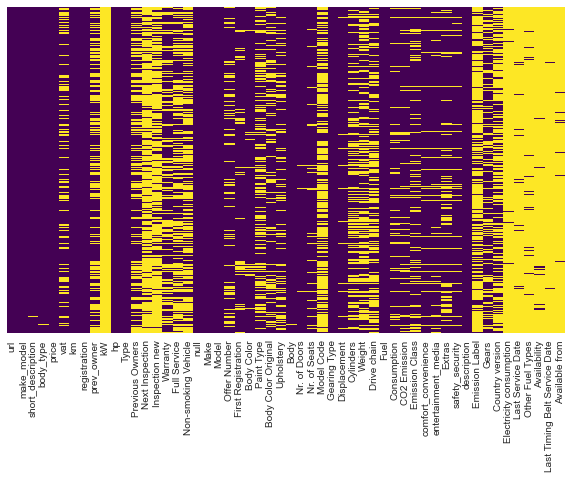

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [15]:
(df.isnull().sum()*100 / df.shape[0]).sort_values(ascending=False)    #percent of null values in columns

kW                              100.000
Last Timing Belt Service Date    99.899
Electricity consumption          99.139
Available from                   98.291
Last Service Date                96.445
Availability                     96.011
Other Fuel Types                 94.472
Next Inspection                  77.794
Inspection new                   75.300
Emission Label                   74.967
Model Code                       68.729
Non-smoking Vehicle              54.916
Country version                  52.346
Full Service                     48.395
Weight                           43.809
Drive chain                      43.081
prev_owner                       42.892
Previous Owners                  41.711
Paint Type                       36.259
Cylinders                        35.681
Warranty                         34.047
Gears                            29.600
vat                              28.350
Body Color Original              23.613
Upholstery                       23.368


Dropped columns first the null values above 90% .

In [16]:
df.drop(columns=['kW','Last Timing Belt Service Date', 'Electricity consumption', 'Available from', 'Last Service Date', 
                 'Availability', 'Other Fuel Types'], inplace=True)

In [17]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'hp', 'Type', 'Previous Owners',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'null', 'Make', 'Model', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'description', 'Emission Label', 'Gears',
       'Country version'],
      dtype='object')

## url 

In [18]:
df.drop(labels='url', axis=1, inplace=True)

We don't need the column 'url', that's why we dropped it.

## make_model & Make & Model

In [19]:
df.make_model

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15914    Renault Espace
15915    Renault Espace
15916    Renault Espace
15917    Renault Espace
15918    Renault Espace
Name: make_model, Length: 15919, dtype: object

In [20]:
df.make_model.isnull().sum()

0

In [21]:
df.Make

0           \nAudi\n
1           \nAudi\n
2           \nAudi\n
3           \nAudi\n
4           \nAudi\n
            ...     
15914    \nRenault\n
15915    \nRenault\n
15916    \nRenault\n
15917    \nRenault\n
15918    \nRenault\n
Name: Make, Length: 15919, dtype: object

In [22]:
df.Model

0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: Model, Length: 15919, dtype: object

In [23]:
df.drop(columns=['Make', 'Model'], inplace=True) #the informations are given already in the column make_model,so we don't need these columns.

## short_description

In [24]:
df.short_description

0              Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                           1.8 TFSI sport
2        Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                                  1.4 TDi Design S tronic
4        Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
                               ...                        
15914                Blue dCi 200CV EDC Executive 4Control
15915                  TCe 225 EDC GPF LIM Deluxe Pano,RFK
15916    Blue dCi 200 EDC Initiale Paris Leder LED Navi...
15917    Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...
15918          INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
Name: short_description, Length: 15919, dtype: object

In [25]:
df.short_description.isnull().sum()

46

In [26]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [27]:
df.drop('short_description', axis=1, inplace=True)

## body_type

In [28]:
df.body_type.isnull().sum()

60

In [29]:
df.body_type.value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## Body

In [30]:
df['Body'].astype('str').value_counts(dropna = False)

['\n', 'Sedans', '\n']           7903
['\n', 'Station wagon', '\n']    3553
['\n', 'Compact', '\n']          3153
['\n', 'Van', '\n']               783
['\n', 'Other', '\n']             290
['\n', 'Transporter', '\n']        88
nan                                60
['\n', 'Off-Road', '\n']           56
['\n', 'Coupe', '\n']              25
['\n', 'Convertible', '\n']         8
Name: Body, dtype: int64

In [31]:
df['Body'].str[1].value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

In [32]:
df['Body'] = df['Body'].str[1]
df.Body

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [33]:
df.drop('Body', axis=1, inplace=True)

Body and body_type have same values,that's why we dropped the column 'Body'.

## price

In [34]:
df.price.value_counts()

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [35]:
df.price.isnull().sum()

0

## vat

In [36]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [37]:
df.km.isnull().sum()

0

In [38]:
df.km.value_counts(dropna=False).sort_values()

9,336 km         1
142,011 km       1
93,307 km        1
119,427 km       1
101,287 km       1
              ... 
50 km          148
5 km           170
1 km           367
- km          1024
10 km         1045
Name: km, Length: 6690, dtype: int64

In [39]:
df['km']=df.km.str.replace(',','').str.split().str[0].str.replace('-','0').astype('int')


In [40]:
df.km.value_counts(dropna=False)

10       1045
0        1043
1         367
5         170
50        148
         ... 
67469       1
43197       1
10027       1
35882       1
57          1
Name: km, Length: 6689, dtype: int64

## registration and First Registration

In [41]:
df.registration.value_counts()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [42]:
df['First Registration']

0        [\n, 2016, \n]
1        [\n, 2017, \n]
2        [\n, 2016, \n]
3        [\n, 2016, \n]
4        [\n, 2016, \n]
              ...      
15914               NaN
15915    [\n, 2019, \n]
15916    [\n, 2019, \n]
15917    [\n, 2019, \n]
15918    [\n, 2019, \n]
Name: First Registration, Length: 15919, dtype: object

In [43]:
df['First Registration'] = df['First Registration'].str[1].astype('float')

In [44]:
df['First Registration'].value_counts()

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
Name: First Registration, dtype: int64

In [45]:
df['age']=2019-df['First Registration']

In [46]:
df.drop(['registration', 'First Registration'], axis=1, inplace=True)

## prev_owner & Previous Owners

In [47]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [48]:
df['Previous Owners'].astype('str').value_counts(dropna=False)

\n1\n                                                                                                        8101
nan                                                                                                          6640
\n2\n                                                                                                         766
\n0\n                                                                                                         163
\n3\n                                                                                                          17
                                                                                                             ... 
['\n1\n', '\n111 g CO2/km (comb)\n']                                                                            1
['\n1\n', '\nEuro 6\n']                                                                                         1
['\n2\n', '\n119 g CO2/km (comb)\n']                                                    

In [49]:
df['Previous Owners'].str[1]

0                              2
1                            NaN
2                              1
3                              1
4                              1
                  ...           
15914                        NaN
15915                         \n
15916    \n139 g CO2/km (comb)\n
15917                        NaN
15918                          1
Name: Previous Owners, Length: 15919, dtype: object

In [50]:
for i in df['Previous Owners']:
    if type(i)==list:
        print(i[0])
    else:
        print(i)


2

nan

1


1


1


1


1


1


1

nan
nan

1


1

nan

1


1

nan

1

nan
nan

1


1


1

nan

1

nan

1


1

nan
nan
nan

1


1


1

nan

1


1


1


2


1


1


1


1


1


1


1


1


0


2


1


1


1

nan
nan

1


1


1


1


2

nan

1


1


1


1


1

nan
nan
nan

1


1

nan

1


1


1


1


1


1


1


1


1


1

nan

1


1


2

nan
nan

1


1


1


1


1


2


1

nan
nan
nan
nan

1


1

nan
nan

1

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

1

nan
nan

1

nan

1


1


1

nan

1


1


1


1


1


1


1

nan
nan
nan

1

nan

1


1


1


1


2

nan
nan

1


1


2


1


2


2


1


1

nan

1


1


1


1


2


1


1


1

nan

1


1


2


1


1


2


2


1

nan

1

nan
nan

1

nan

2


1

nan

2


1


2


1


2


1


1


1


1


1


1


1


1

nan
nan

1


1


1

nan

1

nan

1


1


2

nan

1


1


1

nan

2


2

nan

1

nan

1


1


1


1


1


1


1


1

nan

2


1


1


1


1


1


1

nan
nan
nan

1

nan
nan
nan

1


1


1


1


1


1


1


2


2


1

nan

1


1

nan

1


1



In [51]:
df['Previous Owners']=[i[0] if type(i) == list else i for i in df["Previous Owners"]]

In [52]:
df['Previous Owners']

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous Owners, Length: 15919, dtype: object

In [53]:
df['Previous Owners']=df["Previous Owners"].str.strip("\n").astype('float')

In [54]:
df["Previous Owners"].value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous Owners, dtype: int64

In [55]:
df.drop('prev_owner', axis=1, inplace=True)

## hp

In [56]:
df.hp.value_counts()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

In [57]:
df.hp.str.split().str[0].sort_values()

13158     -
15472     -
15439     -
11183     -
15438     -
         ..
15318    96
15330    96
15384    98
15382    98
15376    98
Name: hp, Length: 15919, dtype: object

In [58]:
df['hp_kW']=df.hp.str.split().str[0].str.replace('-', '0').astype('float')

In [59]:
df.hp_kW.value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
           ... 
84.000        1
195.000       1
44.000        1
239.000       1
9.000         1
Name: hp_kW, Length: 81, dtype: int64

In [60]:
df.drop('hp', axis=1, inplace=True)

## Type

In [61]:
df.Type.astype('str').value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [62]:
df.head()

,make_model,body_type,price,vat,km,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Offer Number,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,comfort_convenience,entertainment_media,Extras,safety_security,description,Emission Label,Gears,Country version,age,hp_kW
0,Audi A1,Sedans,15770,VAT deductible,56013,"[, Used, , Diesel (Particulate Filter)]",2.000,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],[\nLR-062483\n],"[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,3.000,66.000
1,Audi A1,Sedans,14500,Price negotiable,80000,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,"[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,2.000,141.000
2,Audi A1,Sedans,14640,VAT deductible,83450,"[, Used, , Diesel (Particulate Filter)]",1.000,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],[\nAM-95365\n],"[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,3.000,85.000
3,Audi A1,Sedans,14500,None,73000,"[, Used, , Diesel (Particulate Filter)]",1.000,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],NaN,"[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,3.000,66.000
4,Audi A1,Sedans,16790,None,16200,"[, Used, , Diesel (Particulate Filter)]",1.000,NaN,"[\nYes\n, \n109 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],[\nC1626\n],"[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspensio

In [63]:
df.Type.astype('str').str.split().str[1]

0                  'Used',
1                  'Used',
2                  'Used',
3                  'Used',
4                  'Used',
               ...        
15914               'New',
15915              'Used',
15916    'Pre-registered',
15917    'Pre-registered',
15918     'Demonstration',
Name: Type, Length: 15919, dtype: object

In [64]:
df.Type=[i[1] if type(i) == list else i for i in df["Type"]]

In [65]:
df.Type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection

In [66]:
df['Next Inspection'].astype('str').value_counts()

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next Inspection, Length: 1400, dtype: int64

In [67]:
df['Next Inspection'].isnull().sum()

12384

In [68]:
df['Next Inspection']=[i[:] if type(i) == list else i for i in df["Next Inspection"]]
df['Next Inspection'].astype('str').value_counts(dropna=False)

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next Inspection, Length: 1400, dtype: int64

In [69]:
df.drop('Next Inspection', axis=1, inplace=True)

This column has more than 75% null values and the same informations are given in CO2 and Inspection new columns.

## Inspection new

In [70]:
df['Inspection new'].isnull().sum()

11987

In [71]:
df['Inspection new'].astype('str').value_counts()

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

In [72]:
df['Inspection_new'] = [i[0] if type(i) == list else i for i in df['Inspection new']]
df['Inspection_new'] = df['Inspection_new'].str.strip('\n')

In [73]:
df['Inspection_new'].isnull().sum()

11987

In [74]:
df['Inspection_new'].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

A new column 'Inspection_new' is created with the first items from 'Inspection new' column,so we don't need the 'Inspection new' column anymore.

In [75]:
df.drop('Inspection new', axis=1, inplace=True)

## Warranty

In [76]:
df.Warranty.astype('str').value_counts(dropna=False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [77]:
df['Warranty'] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)
df['Warranty'] = df.Warranty.str.strip('\n').str.extract('(\d{1,2})').astype('float')

In [78]:
df.Warranty.value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: Warranty, dtype: int64

In [79]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type',
       'Previous Owners', 'Warranty', 'Full Service', 'Non-smoking Vehicle',
       'null', 'Offer Number', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'description', 'Emission Label', 'Gears',
       'Country version', 'age', 'hp_kW', 'Inspection_new'],
      dtype='object')

## Full Service

In [80]:
df['Full Service'].astype('str').value_counts(dropna=False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

The informations in the column 'Full Service' are given mixed and half of this column are null values.

In [81]:
df.drop('Full Service', axis=1, inplace=True)

## null

In [82]:
df.null.astype('str').value_counts(dropna=False)

[]    15919
Name: null, dtype: int64

In [83]:
df.drop('null', axis=1, inplace=True)

## Non-smoking Vehicle

In [84]:
df['Non-smoking Vehicle'].astype('str').value_counts(dropna=False)

nan                                                                                                             8742
['\n', '\n']                                                                                                    3647
['\n', '\n', '\n4 (Green)\n']                                                                                   1240
['\n', '\n', '\nEuro 6\n']                                                                                      1127
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 345
                                                                                                                ... 
['\n', '\n', '\n', '5.6 l/100 km (comb)', '\n', '7.3 l/100 km (city)', '\n', '4.7 l/100 km (country)', '\n']       1
['\n', '\n', '\n122 g CO2/km (comb)\n']                                                                            1
['\n', '\n', '\n158 g CO2/km (comb)\n']                         

In [85]:
df.drop('Non-smoking Vehicle', axis=1, inplace=True)

## Offer Number

In [86]:
df['Offer Number'].astype('str').value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer Number, Length: 11441, dtype: int64

In [87]:
df.drop('Offer Number', axis=1, inplace=True)

## Body Color

In [88]:
df['Body Color'].astype('str').value_counts(dropna=False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: Body Color, dtype: int64

In [89]:
df.drop('Body Color', axis=1, inplace=True)  

## Body Color Original

In [90]:
df['Body Color Original'].astype('str').value_counts(dropna=False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nRouge-Braun (G0Y)\n']                   1
['\nVARI COLRI DISPONIBILI\n']              1
['\nKokosnussbraun Metallic\n']             1
['\nFarbe frei wählbar\n']                  1
['\nPerlmutt-Weiß Metallic (Weiß)\n']       1
Name: Body Color Original, Length: 1928, dtype: int64

In [91]:
df.drop('Body Color Original', axis=1, inplace=True)

## Paint Type

In [92]:
df['Paint Type'].astype('str').value_counts(dropna=False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: Paint Type, dtype: int64

In [93]:
df['Paint_Type']=df['Paint Type'].str[0].str.strip('\n')

In [94]:
df['Paint_Type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [95]:
df.drop('Paint Type', axis=1, inplace=True) #This column has no affects on the price column.

## Upholstery

In [96]:
df['Upholstery'].astype('str').value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [97]:
df.Upholstery = [i[0] if type(i) == list else i for i in df.Upholstery]

In [98]:
df.Upholstery.value_counts(dropna=False)

\nCloth, Black\n           5821
NaN                        3720
\nPart leather, Black\n    1121
\nCloth\n                  1005
\nCloth, Grey\n             891
\nCloth, Other\n            639
\nFull leather, Black\n     575
\nBlack\n                   491
\nGrey\n                    273
\nOther, Other\n            182
\nPart leather\n            140
\nFull leather\n            139
\nFull leather, Brown\n     116
\nPart leather, Grey\n      116
\nOther, Black\n            110
\nFull leather, Other\n      72
\nFull leather, Grey\n       67
\nPart leather, Other\n      65
\nOther\n                    56
\nPart leather, Brown\n      50
\nalcantara, Black\n         47
\nVelour, Black\n            36
\nFull leather, Beige\n      36
\nCloth, Brown\n             28
\nVelour\n                   16
\nOther, Grey\n              15
\nCloth, Beige\n             13
\nBrown\n                    12
\nCloth, Blue\n              12
\nVelour, Grey\n              8
\nCloth, White\n              8
\nalcant

In [99]:
df.Upholstery = df.Upholstery.str.strip("\n").str.split(", ")

In [100]:
df.Upholstery.astype('str').value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [101]:
u_type=['Part leather', 'Full leather', 'Cloth', 'alcantara', 'Velour']

In [102]:
df['Upholstery_type'] = df.Upholstery.apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [103]:
df.Upholstery_type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [104]:
u_color=['White', 'Brown', 'Red', 'Orange', 'Beige', 'Yellow', 'Blue', 'Black', 'Grey']

In [105]:
def color(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in u_color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(color)

In [106]:
df.Upholstery_color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64

In [107]:
df.drop('Upholstery', axis=1, inplace=True)

N = df[(df["Emission Class"].isnull()) & (df["Next Inspection"].notnull())]["Next Inspection"]
        
for i in N:
    if type(i) == list:
        for j in i:
            if "Euro" in j:
                print(i)
    else:
        pass
print("Found: ")

In [108]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type',
       'Previous Owners', 'Warranty', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'description', 'Emission Label', 'Gears',
       'Country version', 'age', 'hp_kW', 'Inspection_new', 'Paint_Type',
       'Upholstery_type', 'Upholstery_color'],
      dtype='object')

## Nr. of Doors

In [109]:
df['Nr. of Doors'].astype('str').value_counts(dropna=True)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: Nr. of Doors, dtype: int64

In [110]:
df['Nr. of Doors'] = df['Nr. of Doors'].str[0].str.strip('\n').astype('float')

In [111]:
df['Nr. of Doors'].value_counts(dropna=True)

5.000    11575
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64

## Nr. of Seats

In [112]:
df['Nr. of Seats'].astype('str').value_counts(dropna=True)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: Nr. of Seats, dtype: int64

In [113]:
df['Nr. of Seats'] = df['Nr. of Seats'].str[0].str.strip('\n').astype('float')

In [114]:
df['Nr. of Seats'].value_counts(dropna=True)

5.000    13336
4.000     1125
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64

## Model Code

In [115]:
df['Model Code'].astype('str').value_counts()

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: Model Code, Length: 233, dtype: int64

In [116]:
df['Model Code'] = df['Model Code'].str[0].str.strip('\n')

In [117]:
df['Model Code'].value_counts(dropna=True)

0035/BCB    268
0588/BNO    245
0588/BDB    206
0588/BHX    188
1844/ADJ    175
           ... 
0000/ACP      1
0035/BGY      1
0035/bgp      1
0035/BGS      1
3333/BKG      1
Name: Model Code, Length: 232, dtype: int64

In [118]:
df.drop('Model Code', axis=1, inplace=True)  #We dropped because this column has complicated values which are useless.

## Gearing Type

In [119]:
df['Gearing Type'].astype('str').value_counts(dropna=True)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: Gearing Type, dtype: int64

In [120]:
df['Gearing Type']=df['Gearing Type'].str[1]

In [121]:
df['Gearing Type'].value_counts(dropna=True)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

## Displacement

In [122]:
df.Displacement.astype('str').value_counts(dropna=False)

['\n1,598 cc\n']    4761
['\n999 cc\n']      2438
['\n1,398 cc\n']    1314
['\n1,399 cc\n']     749
['\n1,229 cc\n']     677
                    ... 
['\n122 cc\n']         1
['\n1,198 cc\n']       1
['\n1,195 cc\n']       1
['\n2,967 cc\n']       1
['\n1,800 cc\n']       1
Name: Displacement, Length: 78, dtype: int64

In [123]:
df['Displacement_cc'] = df.Displacement.str[0].str.strip('\n').str.strip('cc').str.replace(',','', regex=True).astype('float')

In [124]:
df.Displacement_cc

0       1422.000
1       1798.000
2       1598.000
3       1422.000
4       1422.000
          ...   
15914   1997.000
15915   1798.000
15916   1997.000
15917   1997.000
15918   1798.000
Name: Displacement_cc, Length: 15919, dtype: float64

In [125]:
df.Displacement_cc.value_counts(dropna=False)

1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 78, dtype: int64

In [126]:
df.drop('Displacement', axis=1, inplace=True)

## Cylinders

In [127]:
df.Cylinders.astype('str').value_counts(dropna=False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: Cylinders, dtype: int64

In [128]:
df.Cylinders=df.Cylinders.str[0].str.strip('\n').astype('float')

In [129]:
df.Cylinders.value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64

## Weight

In [130]:
df.Weight.astype('str').value_counts(dropna=False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: Weight, Length: 435, dtype: int64

In [131]:
df['Weight_kg']=df.Weight.str[0].str.strip('\n').str.strip('kg').str.replace(',','').astype('float')

In [132]:
df.Weight_kg.value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1960.000       1
1258.000       1
1167.000       1
1331.000       1
2037.000       1
Name: Weight_kg, Length: 435, dtype: int64

In [133]:
df.drop('Weight', axis=1, inplace=True)

## Drive chain

In [134]:
df['Drive chain'].astype('str').value_counts(dropna=False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: Drive chain, dtype: int64

In [135]:
df['Drive chain']=df['Drive chain'].str[0].str.strip('\n')

In [136]:
df['Drive chain'].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive chain, dtype: int64

## Fuel

In [137]:
df.Fuel.astype('str').value_counts(dropna=False)

['\n', 'Diesel (Particulate Filter)', '\n']                                                                                  4315
['\n', 'Super 95', '\n']                                                                                                     3338
['\n', 'Gasoline', '\n']                                                                                                     3175
['\n', 'Diesel', '\n']                                                                                                       2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                 424
                                                                                                                             ... 
['\n', 'Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91', '\n']                                                          1
['\n', 'Super Plus 98 / Super E10 95', '\n']                                              

In [138]:
df.Fuel=df.Fuel.str[1]

In [139]:
df.Fuel.value_counts(dropna=False)

Diesel (Particulate Filter)                                                                                  4315
Super 95                                                                                                     3338
Gasoline                                                                                                     3175
Diesel                                                                                                       2984
Super 95 / Regular/Benzine 91                                                                                 424
                                                                                                             ... 
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91                                                          1
Super Plus 98 / Super E10 95                                                                                    1
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / 

In [140]:
df["Fuel"] = df.Fuel.str.split("/").str[0].str.strip()

In [141]:
df["Fuel"].unique()

array(['Diesel (Particulate Filter)', 'Gasoline', 'Super 95', 'Regular',
       'Diesel', 'Super E10 95', 'Super 95 (Particulate Filter)',
       'Others', 'Gasoline (Particulate Filter)',
       'Super E10 95 (Particulate Filter)', 'Super Plus 98', 'CNG',
       'Electric', 'CNG (Particulate Filter)',
       'Others (Particulate Filter)', 'Biogas', 'Domestic gas H',
       'Super Plus E10 98', 'LPG', 'Liquid petroleum gas (LPG)'],
      dtype=object)

In [142]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [143]:
benzine=["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg=["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
electric=["Electric"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in electric:
        return "Electric"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"]= df.Fuel.apply(fueltype)

In [144]:
df["Fuel"].value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

## Consumption

In [145]:
df.Consumption.astype('str').value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [146]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [147]:
df['cons_comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_city'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [148]:
df["cons_comb"].value_counts(dropna=False)

NaN       2033
5.400      770
3.900      733
4.000      713
5.100      657
          ... 
33.000       1
50.000       1
1.000        1
46.000       1
11.000       1
Name: cons_comb, Length: 73, dtype: int64

In [149]:
df.drop('Consumption', axis=1,inplace=True)

## CO2 Emission

In [150]:
df['CO2 Emission'].astype('str').value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: CO2 Emission, Length: 124, dtype: int64

In [151]:
df["CO2_Emission"] = [item[0] if type(item) == list else item for item in df["CO2 Emission"]]
df["CO2_Emission"] = df["CO2_Emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

In [152]:
df.CO2_Emission.value_counts(dropna=False)

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
990.000       1
12.324        1
1.060         1
51.000        1
193.000       1
Name: CO2_Emission, Length: 121, dtype: int64

In [153]:
df.drop("CO2 Emission", axis=1, inplace=True)

## Emission Class

In [154]:
df['Emission Class'].astype('str').value_counts(dropna=False)

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: Emission Class, dtype: int64

In [155]:
df["Emission Class"]=df["Emission Class"].apply(lambda item : item[0] if type(item)==list else item)
df["Emission Class"]=df["Emission Class"].str.strip('\n').str.replace(' ','', regex=True)

In [156]:
df["Emission Class"].value_counts(dropna=False)

Euro6          10139
NaN             3628
Euro6d-TEMP     1845
Euro6c           127
Euro5             78
Euro6d            62
Euro4             40
Name: Emission Class, dtype: int64

## comfort_convenience

In [157]:
df.comfort_convenience.astype('str').value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                                                                          

In [158]:
df["comfort_convenience"] = [",".join(item) if type(item) == list else item for item in df["comfort_convenience"]]

In [159]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

## entertainment_media

In [160]:
df.entertainment_media.astype('str').value_counts(dropna=False)

nan                                                                                                                             1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                                                      1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                                982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                   783
['On-board computer', 'Radio']                                                                                                   487
                                                                                                                                ... 
['Bluetooth', 'CD player', 'Digital radio', 'Hands-free equipment', 'Radio']                                                       1
['CD player', 'Hands-free equipment', 'MP3', 'Radio', 'USB']         

In [161]:
df["entertainment_media"] = [",".join(item) if type(item) == list else item for item in df["entertainment_media"]]

In [162]:
df.entertainment_media.value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

## Extras

In [163]:
df.Extras.astype('str').value_counts(dropna=False)

['Alloy wheels']                                                                                                                 3245
nan                                                                                                                              2962
['Alloy wheels', 'Touch screen']                                                                                                  697
['Alloy wheels', 'Voice Control']                                                                                                 577
['Alloy wheels', 'Touch screen', 'Voice Control']                                                                                 541
                                                                                                                                 ... 
['Alloy wheels', 'Catalytic Converter', 'Shift paddles', 'Sport package', 'Sport seats', 'Sport suspension', 'Voice Control']       1
['Alloy wheels', 'Catalytic Converter', 'Roof rack', 'Sport pa

In [164]:
df['Extras'] = [",".join(item) if type(item) == list else item for item in df['Extras']]

In [165]:
df.Extras.value_counts(dropna=False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

## safety_security

In [166]:
df.safety_security.astype('str').value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                      982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                                                                                                                     538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering

In [167]:
df['safety_security'] = [",".join(item) if type(item) == list else item for item in df['safety_security']]

In [168]:
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

## description

In [169]:
df.description.astype('str').value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [170]:
df.drop('description', axis=1, inplace=True)

## Emission Label

In [171]:
df['Emission Label'].astype('str').value_counts(dropna=False)


nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: Emission Label, dtype: int64

In [172]:
df.drop('Emission Label', axis=1, inplace=True)

## Gears

In [173]:
df.Gears.astype('str').value_counts(dropna=True)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n1\n']        2
['\n3\n']        2
['\n4\n']        2
['\n2\n']        1
['\n50\n']       1
Name: Gears, dtype: int64

In [174]:
df["Gears"] = df.Gears.str[0].str.strip('\n')

In [175]:
df.Gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

## Country version

In [176]:
df['Country version'].astype('str').value_counts(dropna=False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nSlovakia\n']             4
['\nCroatia\n']              4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nLuxembourg\n']           1
['\nSwitzerland\n']          1
['\nSlovenia\n']             1
['\nEgypt\n']                1
['\nSerbia\n']               1
Name: Country version, dtype: int64

In [177]:
df["Country version"] = df['Country version'].str[0].str.strip('\n')

In [178]:
df['Country version'].value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country version, dtype: int64

In [179]:
df.drop('Country version', axis=1, inplace=True)

In [180]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type',
       'Previous Owners', 'Warranty', 'Nr. of Doors', 'Nr. of Seats',
       'Gearing Type', 'Cylinders', 'Drive chain', 'Fuel', 'Emission Class',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Gears', 'age', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Upholstery_color', 'Displacement_cc',
       'Weight_kg', 'cons_comb', 'cons_city', 'cons_country', 'CO2_Emission'],
      dtype='object')

In [181]:
df.rename(columns={'Previous Owners':'Previous_Owners', 'Nr. of Doors':'Nr_of_Doors',
                   'Nr. of Seats':'Nr_of_Seats', 'Gearing Type':'Gearing_Type', 
                   'Drive chain': 'Drive_Chain', 'Emission Class':'Emission_Class'}, inplace=True)

In [182]:
df.shape

(15919, 32)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   15919 non-null  int32  
 5   Type                 15917 non-null  object 
 6   Previous_Owners      9279 non-null   float64
 7   Warranty             4853 non-null   float64
 8   Nr_of_Doors          15707 non-null  float64
 9   Nr_of_Seats          14942 non-null  float64
 10  Gearing_Type         15919 non-null  object 
 11  Cylinders            10239 non-null  float64
 12  Drive_Chain          9061 non-null   object 
 13  Fuel                 15919 non-null  object 
 14  Emission_Class       12291 non-null  object 
 15  comfort_convenience  14999 non-null 

In [184]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013,80000,83450,73000,16200
Type,Used,Used,Used,Used,Used
Previous_Owners,2.000,NaN,1.000,1.000,1.000
Warranty,NaN,NaN,NaN,NaN,NaN
Nr_of_Doors,5.000,3.000,4.000,3.000,5.000
Nr_of_Seats,5.000,4.000,4.000,4.000,5.000


In [185]:
df.to_csv("auto_scout_cleaned.csv", index=False)

'''
END'''